<a href="https://colab.research.google.com/github/sarashriloyola-code/Data-Analysis/blob/main/StressStrainCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# =========================================
# Stress–Strain Data Analysis (Safe Version)
# =========================================

# Step 0: Import required library
import pandas as pd

# -----------------------------------------
# Step 1: Load the CSV file
# -----------------------------------------
file_path = "stress_strain_practice.csv"

# Read CSV safely
try:
    df = pd.read_csv(file_path)
except Exception as e:
    print("Error reading CSV file:", e)
    raise

# Show first 5 rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# -----------------------------------------
# Step 2: Ensure numeric columns
# (Prevents calculation errors)
# -----------------------------------------
numeric_columns = [
    "Force_N",
    "Cross_Section_Area_mm2",
    "Elongation_mm",
    "Original_Length_mm"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# -----------------------------------------
# Step 3: Calculate Stress (MPa)
# Stress = Force / Area
# -----------------------------------------
df["Stress_MPa"] = df["Force_N"] / df["Cross_Section_Area_mm2"]

# -----------------------------------------
# Step 4: Calculate Strain (%)
# Strain (%) = (Elongation / Original Length) * 100
# -----------------------------------------
df["Strain_percent"] = (
    df["Elongation_mm"] / df["Original_Length_mm"]
) * 100

# -----------------------------------------
# Step 5: Remove rows with invalid calculations
# -----------------------------------------
df_clean = df.dropna(
    subset=["Stress_MPa", "Strain_percent", "Material"]
)

# -----------------------------------------
# Step 6: Group by Material
# (Average Stress & Strain)
# -----------------------------------------
material_avg = (
    df_clean
    .groupby("Material")
    .agg({
        "Stress_MPa": "mean",
        "Strain_percent": "mean"
    })
    .reset_index()
)

print("\nAverage Stress and Strain by Material:")
print(material_avg)

# -----------------------------------------
# Step 7: Identify Strongest Material
# -----------------------------------------
max_stress_index = material_avg["Stress_MPa"].idxmax()
strongest_material = material_avg.loc[max_stress_index]

print("\nStrongest Material (Highest Average Stress):")
print(strongest_material)

# -----------------------------------------
# Step 8: Stress Summary Statistics
# (Min, Max, Avg)
# -----------------------------------------
stress_summary = (
    df_clean
    .groupby("Material")["Stress_MPa"]
    .agg(["min", "max", "mean"])
    .reset_index()
)

# Rename columns for clarity
stress_summary.columns = [
    "Material",
    "Min_Stress_MPa",
    "Max_Stress_MPa",
    "Avg_Stress_MPa"
]

print("\nStress Summary by Material:")
print(stress_summary)

# -----------------------------------------
# Step 9: Export results to CSV files
# -----------------------------------------
try:
    df_clean.to_csv("stress_strain_with_calculations.csv", index=False)
    material_avg.to_csv("material_average_stress_strain.csv", index=False)
    stress_summary.to_csv("material_stress_summary.csv", index=False)
    print("\nCSV files exported successfully.")
except Exception as e:
    print("Error exporting CSV files:", e)


First 5 rows of the dataset:
  Test_ID  Material  Force_N  Cross_Section_Area_mm2  Elongation_mm  \
0    T001     Steel     1749                      27           0.51   
1    T002  Aluminum     2901                      20           0.45   
2    T003    Copper     2463                      19           0.76   
3    T004     Brass     2197                      33           0.50   
4    T005  Titanium     1312                      33           0.45   

   Original_Length_mm   Test_Date  
0                 100  2025-01-01  
1                 100  2025-01-02  
2                 100  2025-01-03  
3                 100  2025-01-04  
4                 100  2025-01-05  

Average Stress and Strain by Material:
   Material  Stress_MPa  Strain_percent
0  Aluminum   83.776627        0.550000
1     Brass   72.805132        0.535000
2    Copper  107.466696        0.545000
3     Steel   59.954850        0.630000
4  Titanium   65.957533        0.561667

Strongest Material (Highest Average Stress):
M


First 5 rows:
  Test_ID  Material  Force_N  Cross_Section_Area_mm2  Elongation_mm  \
0    T001     Steel     1749                      27           0.51   
1    T002  Aluminum     2901                      20           0.45   
2    T003    Copper     2463                      19           0.76   
3    T004     Brass     2197                      33           0.50   
4    T005  Titanium     1312                      33           0.45   

   Original_Length_mm   Test_Date  
0                 100  2025-01-01  
1                 100  2025-01-02  
2                 100  2025-01-03  
3                 100  2025-01-04  
4                 100  2025-01-05  

⚠️ Tests where Stress exceeded 200 MPa:
No tests exceeded 200 MPa.

Average Stress by Material:
   Material  Average_Stress_MPa
0  Aluminum           83.776627
1     Brass           72.805132
2    Copper          107.466696
3     Steel           59.954850
4  Titanium           65.957533


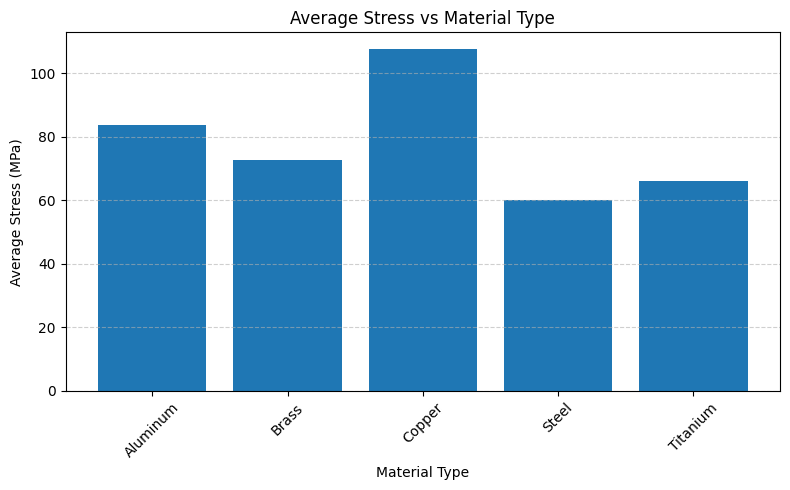


✅ All results exported successfully.


In [6]:
# =========================================
# Stress–Strain Analysis with Visualization
# =========================================

import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------
# Step 1: Load CSV safely
# -----------------------------------------
file_path = "stress_strain_practice.csv"

try:
    df = pd.read_csv(file_path)
except Exception as e:
    print("Error loading CSV file:", e)
    raise

print("\nFirst 5 rows:")
print(df.head())

# -----------------------------------------
# Step 2: Convert required columns to numeric
# (handles missing or invalid values)
# -----------------------------------------
required_numeric_cols = [
    "Force_N",
    "Cross_Section_Area_mm2",
    "Elongation_mm",
    "Original_Length_mm"
]

for col in required_numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        raise KeyError(f"Missing required column: {col}")

# -----------------------------------------
# Step 3: Calculate Stress and Strain
# -----------------------------------------
df["Stress_MPa"] = df["Force_N"] / df["Cross_Section_Area_mm2"]
df["Strain_percent"] = (
    df["Elongation_mm"] / df["Original_Length_mm"]
) * 100

# -----------------------------------------
# Step 4: Remove rows with missing values
# -----------------------------------------
df_clean = df.dropna(
    subset=["Material", "Stress_MPa", "Strain_percent"]
)

# -----------------------------------------
# Step 5: Highlight tests where Stress > 200 MPa
# -----------------------------------------
high_stress_tests = df_clean[df_clean["Stress_MPa"] > 200]

print("\n⚠️ Tests where Stress exceeded 200 MPa:")
if high_stress_tests.empty:
    print("No tests exceeded 200 MPa.")
else:
    print(high_stress_tests[
        ["Test_ID", "Material", "Stress_MPa"]
    ])

# -----------------------------------------
# Step 6: Average Stress by Material
# -----------------------------------------
material_avg = (
    df_clean
    .groupby("Material", as_index=False)
    .agg(Average_Stress_MPa=("Stress_MPa", "mean"))
)

print("\nAverage Stress by Material:")
print(material_avg)

# -----------------------------------------
# Step 7: Visualization
# Bar chart: Stress vs Material
# -----------------------------------------
plt.figure(figsize=(8, 5))

plt.bar(
    material_avg["Material"],
    material_avg["Average_Stress_MPa"]
)

plt.xlabel("Material Type")
plt.ylabel("Average Stress (MPa)")
plt.title("Average Stress vs Material Type")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# -----------------------------------------
# Step 8: Export results
# -----------------------------------------
df_clean.to_csv("stress_strain_with_calculations.csv", index=False)
high_stress_tests.to_csv("high_stress_tests_over_200MPa.csv", index=False)
material_avg.to_csv("material_average_stress.csv", index=False)

print("\n✅ All results exported successfully.")